# Dementia Prediction
- **Dementia** is one of the common causes of memory loss and death gloabally. Many people are not even aware of the fact that they might have dementia or not. Hence, we are driven by this motivation to build machine learning applications that have no unbiasedness and possess high probability of detecting and predicting dementia at any stage.

#### Introduction 
> This project leverages deep learning models(CNN models) for the prediction of Dementia or no Dementia amongst well represented patients samples. 
> This project will make use of pytorch and different CNN models. 
- The best model will be deployed for real usage in medical sectors for dementia prediction 

#### Importing Libraries 

In [145]:
#import methods from the torchvision class
from torchvision.datasets import ImageFolder 
from torchvision import transforms , datasets 
from torch.utils.data import DataLoader, random_split 
import matplotlib.pyplot as plt 
import os 
import torch.nn as nn 

In [146]:
print(os.path.exists('Alzheimer_dataset/train'))

True


In [147]:
print(os.listdir('Alzheimer_dataset/train'))

['Dementia', 'NonDementia']


### Prior Examination and transformation 
#### Transformation 

In [148]:

#use the transforms object to apply the needed transformation by accessing the Compose method
transform_traindata = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(45),
    transforms.RandomAutocontrast(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop(size=(128, 128)),
    transforms.RandomGrayscale(p=0.2),
    transforms.RandomPerspective(distortion_scale=0.5, p=0.5),
    transforms.GaussianBlur(kernel_size=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.Resize((128, 128))
])



transform_testdata= transforms.Compose([
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
     transforms.Resize((128, 128))
])

#### Data Collection 

In [149]:
train_data = ImageFolder(
    #use the "r" to make python avoid escape issues
  r"C:\Users\512GB\OneDrive\Documents\Research Projects\Dementia Research\Deep-Learning-and-Classical-ML-models-for-Dementia-Prediction\Predicting Dementia\Alzheimer_dataset\train",
  transform = transform_traindata
)

train_size= int(0.8 * len(train_data))
val_size= len(train_data) - train_size

train_dataset, val_dataset= random_split(train_data, [train_size, val_size])

val_dataset.transform= transform_testdata



test = ImageFolder(
    #use the "r" to make python avoid escape issues
  r"C:\Users\512GB\OneDrive\Documents\Research Projects\Dementia Research\Deep-Learning-and-Classical-ML-models-for-Dementia-Prediction\Predicting Dementia\Alzheimer_dataset\test",
  transform = transform_testdata
)   


In [150]:
#instantiate an object of the data loader class 
dataloader_train = DataLoader(
  train_dataset, shuffle=True, batch_size=1
)

dataloader_val = DataLoader(
    val_dataset, shuffle=True, batch_size=32
     
)

dataloader_test= DataLoader(
    test, shuffle=True, batch_size=32
) 

In [151]:
print(len(dataloader_train))
print(len(dataloader_test))
print(len(dataloader_val))

4055
35
32


In [152]:
#get an image and its label
image, label = next(iter(dataloader_train))
#Reshape the image tensor
print(image.shape ) 


torch.Size([1, 3, 128, 128])


In [153]:
#image = image.squeeze().permute(1, 2, 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

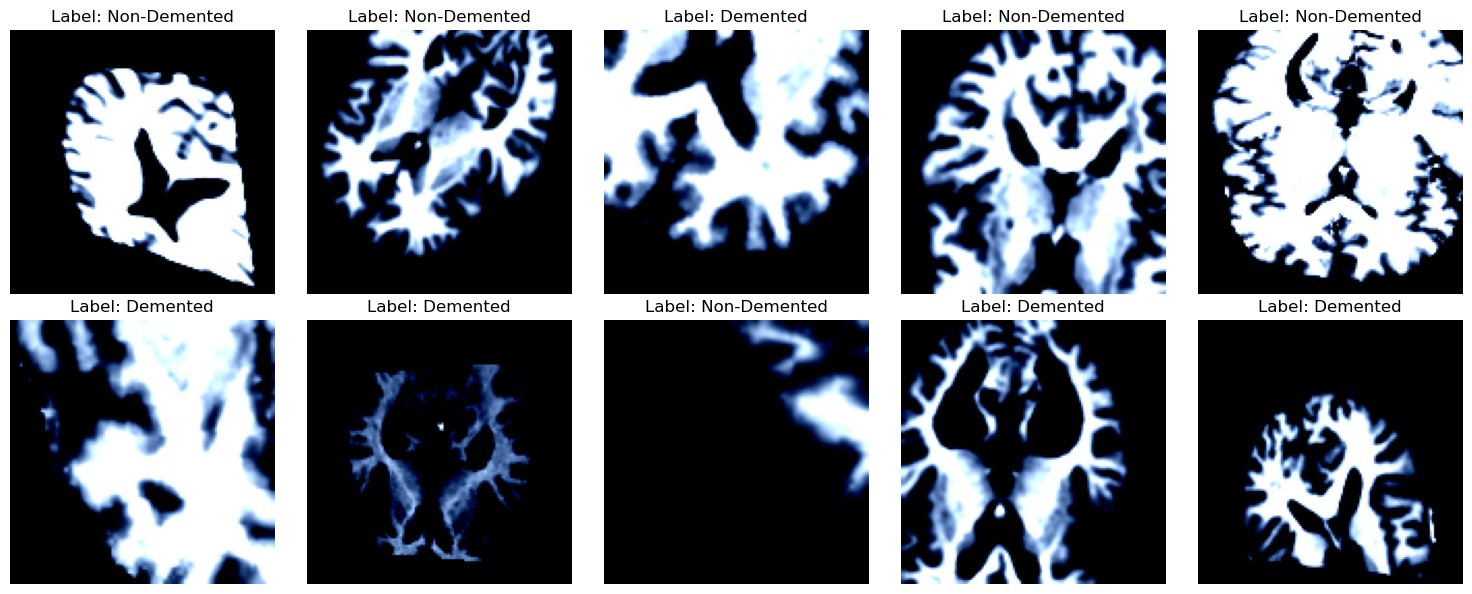

In [154]:
import matplotlib.pyplot as plt

# Define the figure (2 rows with 5 images each) and axis objects
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
# Flatten the axes array
axs = axs.ravel()

# Initialize index for subplots
subplot_index = 0

# Load first 10 examples
for images, labels in dataloader_train:
    if subplot_index >= 10:  # Only plot up to 10 images
        break

    # Plot individual images from the batch
    for j in range(images.size(0)):  # Loop through the batch
        if subplot_index >= 10:  # Stop if we have plotted 10 images
            break
        
        # Extract the j-th image and label from the batch
        image = images[j]  # shape [3, 128, 128]
        label = labels[j]  # Assuming labels is of the same size as images

        # Plot image and set title to the corresponding label
        axs[subplot_index].imshow(image.permute(1, 2, 0))  # Convert from CxHxW to HxWxC
        axs[subplot_index].title.set_text(f'Label: {"Demented" if label.item() == 0 else "Non-Demented"}')
        axs[subplot_index].axis('off')  # Hide axes for visual appeal

        subplot_index += 1  # Move to the next subplot

plt.tight_layout()
plt.show();


In [155]:
#create a class of the model on the nn.Module parent class

class Net(nn.Module):
    #initialize the class constructor and input self and needed parameters
    def __init__(self, num_classes):
        #connec the class with the properties and methods using the super function
        super().__init__()
        #define the sequential method to extract the needed features
        self.feature_extractor= nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv3d(64, 128, kernel_size=3, padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten() 

        )

        self.imageclassifier = nn.Linear(128 * 8 * 8, num_classes)


        def forward(self, x):
            x= self.feature_extractor(x)
            x= self.imageclassifier(x)
            return x 
